In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Setting up the visualisation style
sns.set(style="whitegrid")

In [6]:
# Define the file path

file_path = "/kaggle/input/sample-sales-data/sales_data_sample.csv"

# Read the CSV file using the correct encoding
df = pd.read_csv(file_path, encoding='latin1')

# Fill missing values
df['ADDRESSLINE2'].fillna('', inplace=True)
df['STATE'].fillna('Unknown', inplace=True)
df['POSTALCODE'].fillna('00000', inplace=True)
df['TERRITORY'].fillna('Unknown', inplace=True)

# Convert ORDERDATE to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%m/%d/%Y %H:%M')

# Verify the changes
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

/tmp/ipykernel_33/2735287330.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ADDRESSLINE2'].fillna('', inplace=True)
/tmp/ipykernel_33/2735287330.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

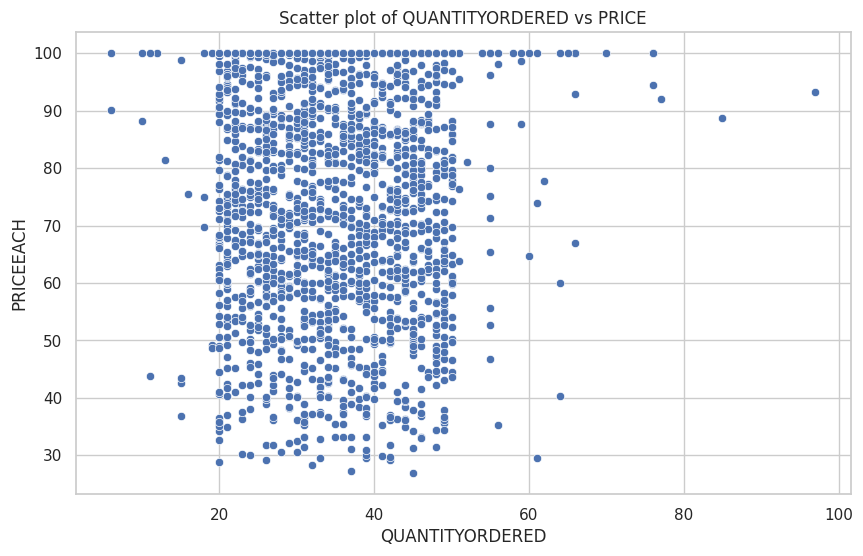

In [7]:
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QUANTITYORDERED', y='PRICEEACH', data=df)
plt.title('Scatter plot of QUANTITYORDERED vs PRICE')
plt.show()

/tmp/ipykernel_33/2572260958.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='ORDERDATE')['SALES'].sum()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


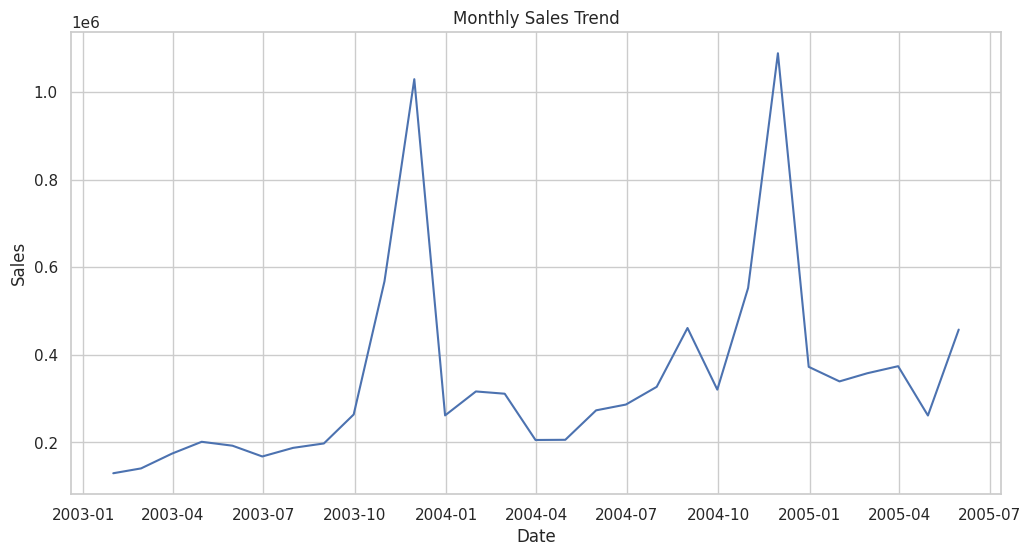

In [8]:
# Example visualizations
# Time Series Analysis: Monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales = df.resample('M', on='ORDERDATE')['SALES'].sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show() 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


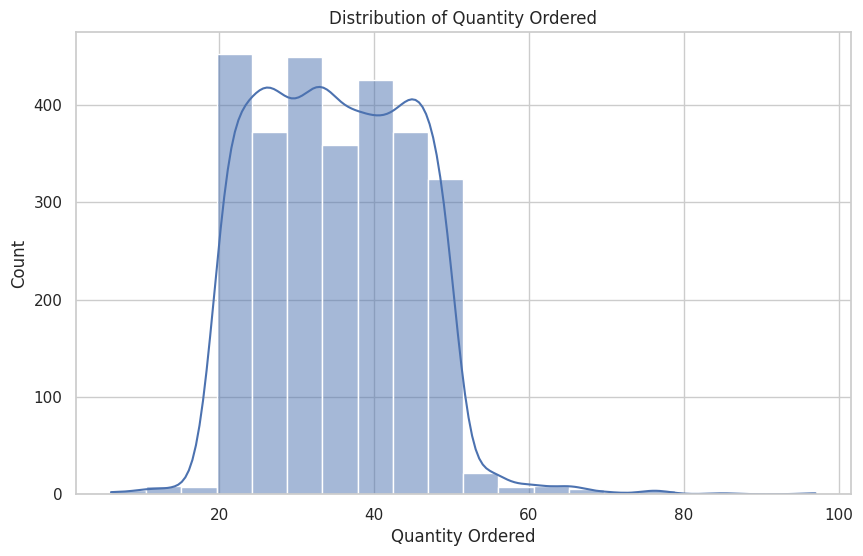

In [9]:
# Distribution of Quantity Ordered
plt.figure(figsize=(10, 6))
sns.histplot(df['QUANTITYORDERED'], bins=20, kde=True)
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Count')
plt.show() 

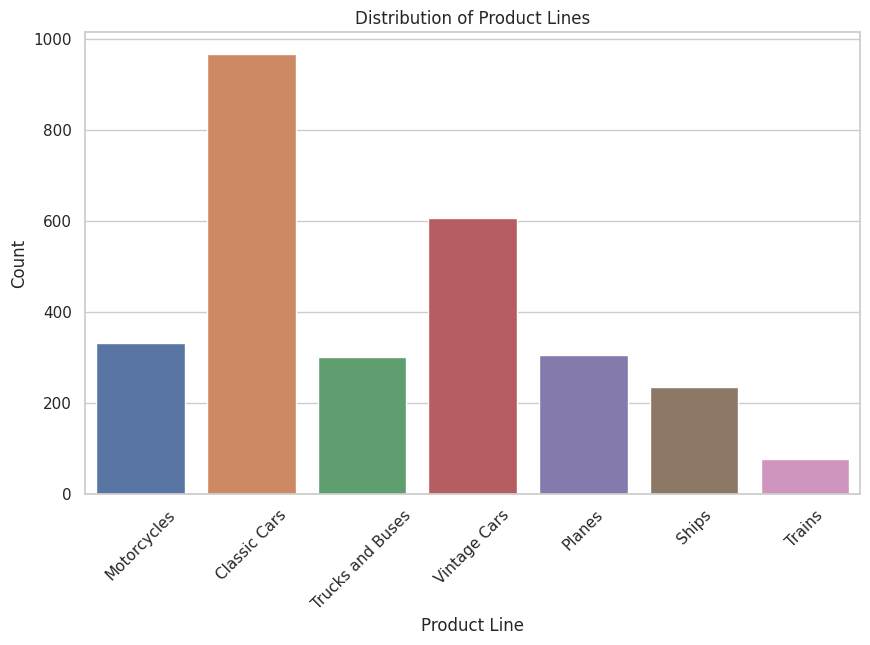

In [10]:
# Categorical variables: Count plot for Product Line
plt.figure(figsize=(10, 6))
sns.countplot(x='PRODUCTLINE', data=df)
plt.title('Distribution of Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

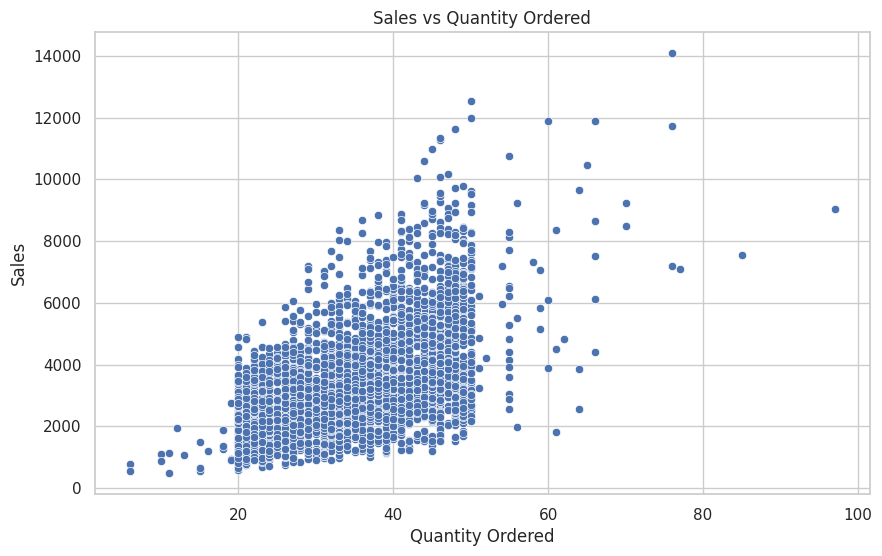

In [11]:
# Pairwise relationships (example with Sales vs Quantity Ordered)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=df)
plt.title('Sales vs Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()

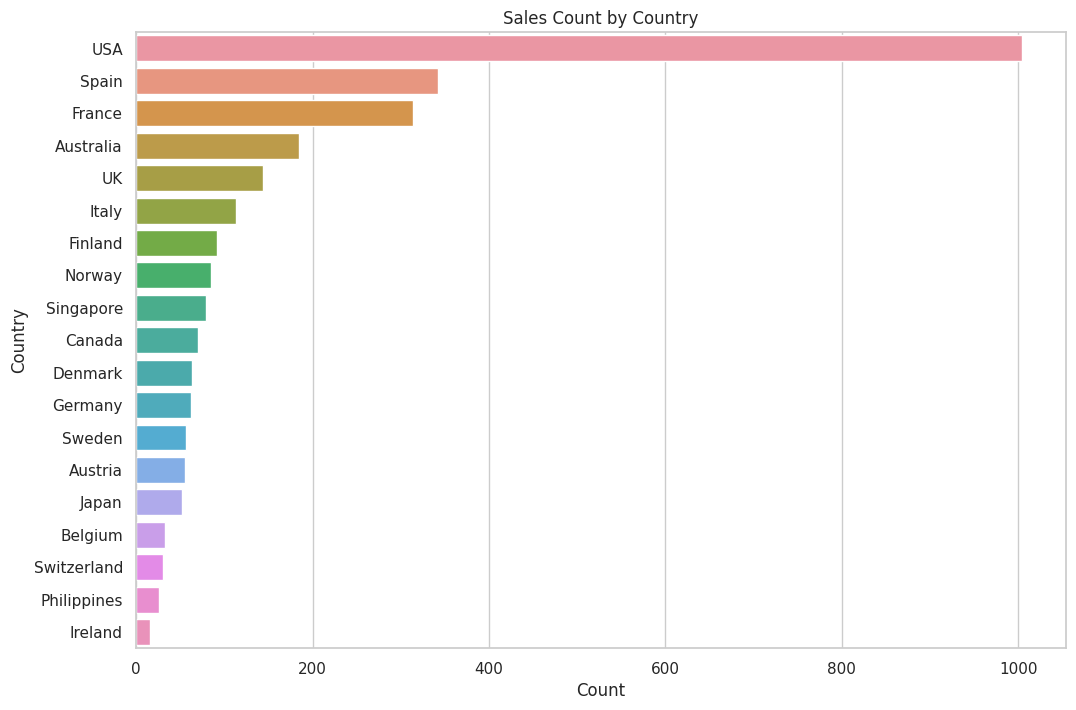

In [12]:
# Customer Analysis: Count of sales by Country
plt.figure(figsize=(12, 8))
sns.countplot(y='COUNTRY', data=df, order=df['COUNTRY'].value_counts().index)
plt.title('Sales Count by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [13]:
# Average and maximum prices of orders
average_price = df['PRICEEACH'].mean()
max_price = df['PRICEEACH'].max()

print(f"Average price of orders: ${average_price:.2f}")
print(f"Maximum price of orders: ${max_price:.2f}")

Average price of orders: $83.66
Maximum price of orders: $100.00


In [14]:
# Product lines with the highest average purchase
average_purchase_by_productline = df.groupby('PRODUCTLINE')['SALES'].mean()
highest_avg_productline = average_purchase_by_productline.idxmax()
highest_avg_purchase = average_purchase_by_productline.max()

print(f"Product line with highest average purchase: {highest_avg_productline}")
print(f"Highest average purchase amount: ${highest_avg_purchase:.2f}")

Product line with highest average purchase: Classic Cars
Highest average purchase amount: $4053.38


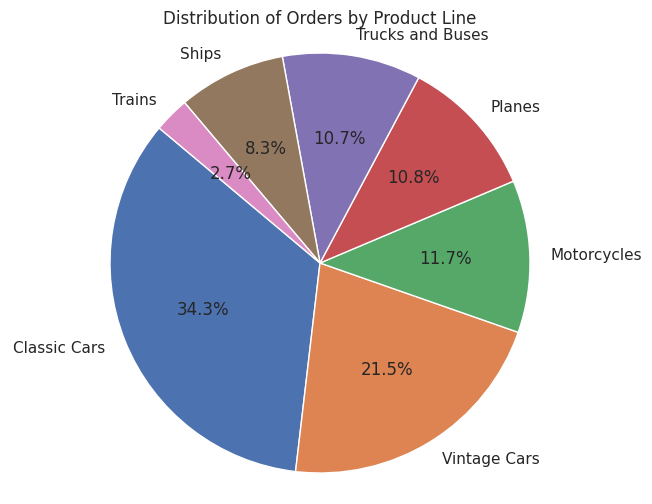

In [16]:
# Pie chart for distribution of orders by product line
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
productline_counts = df['PRODUCTLINE'].value_counts()
plt.pie(productline_counts, labels=productline_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Orders by Product Line')
plt.axis('equal')
plt.show() 

In [17]:
# Identify the region with the highest shipment
highest_shipment_region = df['TERRITORY'].value_counts().idxmax()
total_shipments = df['TERRITORY'].value_counts().max()

print(f"Region with the highest shipment: {highest_shipment_region}")
print(f"Total shipments from this region: {total_shipments}")

Region with the highest shipment: EMEA
Total shipments from this region: 1407


In [18]:
# Determine when purchases from the region are most frequent
df_region = df[df['TERRITORY'] == highest_shipment_region]

# Extract month and year from ORDERDATE
df_region['MONTH'] = df_region['ORDERDATE'].dt.month
df_region['YEAR'] = df_region['ORDERDATE'].dt.year

# Count purchases by month and year
most_frequent_month = df_region['MONTH'].mode().values[0]
most_frequent_year = df_region['YEAR'].mode().values[0]

print(f"Most frequent time of year for purchases from {highest_shipment_region}:")
print(f"Month: {most_frequent_month}")
print(f"Year: {most_frequent_year}")

Most frequent time of year for purchases from EMEA:
Month: 11
Year: 2004


/tmp/ipykernel_33/667221683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['MONTH'] = df_region['ORDERDATE'].dt.month
/tmp/ipykernel_33/667221683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['YEAR'] = df_region['ORDERDATE'].dt.year


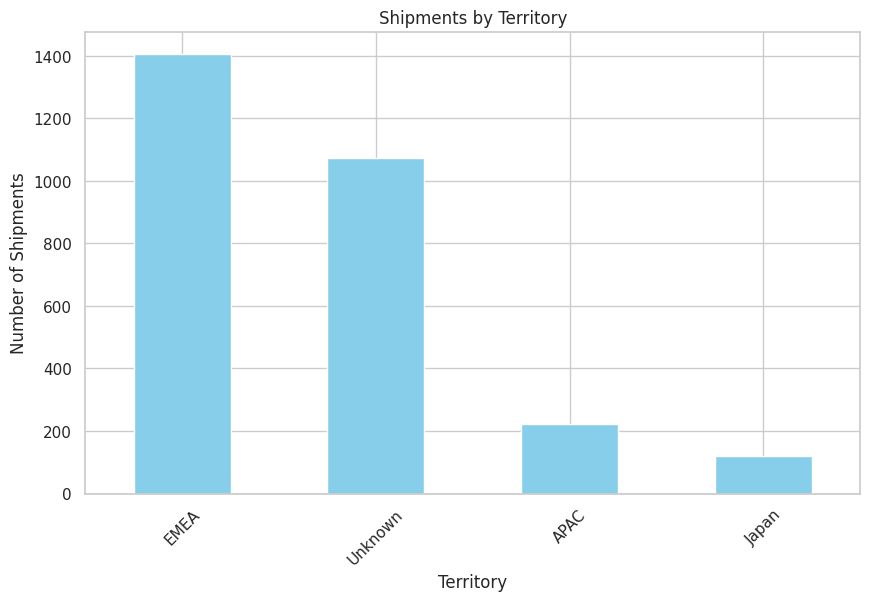

In [19]:
# Bar plot for region with highest shipment
plt.figure(figsize=(10, 6))
shipment_counts = df['TERRITORY'].value_counts()
shipment_counts.plot(kind='bar', color='skyblue')
plt.title('Shipments by Territory')
plt.xlabel('Territory')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_33/3621534188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['YEAR_MONTH'] = df_region['ORDERDATE'].dt.to_period('M')


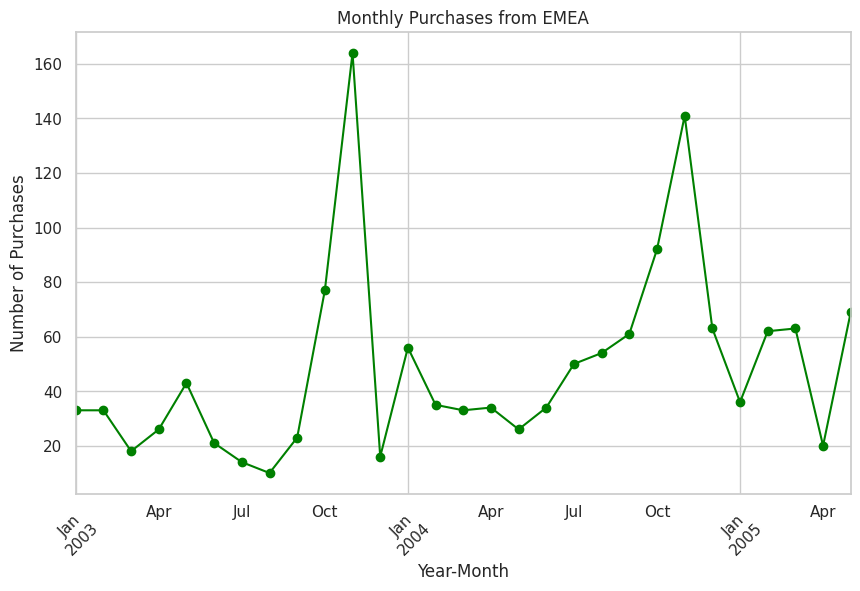

In [20]:
# Line plot for most frequent time of year for purchases from the highest shipment region
plt.figure(figsize=(10, 6))
df_region['YEAR_MONTH'] = df_region['ORDERDATE'].dt.to_period('M')
purchase_counts = df_region['YEAR_MONTH'].value_counts().sort_index()
purchase_counts.plot(kind='line', marker='o', color='green')
plt.title(f'Monthly Purchases from {highest_shipment_region}')
plt.xlabel('Year-Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()